<Axes: >

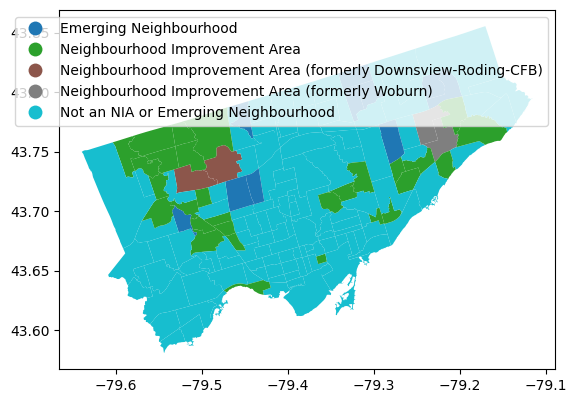

In [ ]:
import geopandas as gpd
import pandas as pd

geo_df = gpd.read_file("../data/raw/neighbourhood-boundaries.geojson")

raw_df = pd.read_excel("../data/raw/neighbourhood-profiles-2021-158-model.xlsx")
df = raw_df.transpose().reset_index()
df.columns = ['Neighbourhood'] + list(df.iloc[0, 1:])
df = df[1:]

# data cleaning - removing previous formatting
df['Neighbourhood'] = df['Neighbourhood'].str.strip().str.title()
geo_df['AREA_NAME'] = geo_df['AREA_NAME'].str.replace(r'\s*\(\d+\)', '', regex = True)

merged_data = geo_df.merge(df, left_on = 'AREA_NAME', right_on = 'Neighbourhood', how = 'left')